# Modeling the Hourly Rate

## Importing Libraries and Data

In [16]:
# Data Analysis and Modeling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Cross-Validation and Accuracy Measures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Other
from matplotlib import pyplot as plt

# Model Serializing
import pickle

# Packages for PostgreSQL Import
import psycopg2

In [2]:
# Ideally I'll move this into the project config.py file
# Otherwise for now I have to just manually assign . . .

dbname = "freelance_db"
username = "Metaverse"
pswd = "Arcifice91"

In [3]:
# Connect to Data (from: scraping_data.ipynb)

con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

# Extract freelance_db as fl_table, don't bring Punjab obs
sql_query = """SELECT * FROM analysis_table;"""
analysis_dt = pd.read_sql_query(sql_query, con)

In [4]:
# Doing some cleaning. Removing columns that have their continuous analog.

analysis_dt = analysis_dt.drop(['has_rating'], axis=1)
analysis_dt = analysis_dt.drop(['index'], axis=1)

## Estimating a Random Forest Regression
1. Predicting hourly_rate
2. Okay some options:
    - Remove outliers
3. The next model would be:
    - Predict the probability of getting a job?
    - Could try using the bio features here.
4. And?

In [23]:
# Converting to numpy arrays and saving column names
y = np.array(analysis_dt['hourly_rate'])

analysis_dt.drop(['hourly_rate'], axis = 1)
feature_list = list(analysis_dt.columns)

X = np.array(analysis_dt)

In [9]:
# Creating train and test splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
# Getting Baseline
baseline_preds = y_train.mean()

# Baseline Errors
baseline_errors = abs(baseline_preds - y)

# Baseline:
print('Mean Absolute Error (naive average): ', round(np.mean(baseline_errors), 2))

Mean Absolute Error (naive average):  19.12


In [ ]:
# Modeling
# Reference: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

# Predict
preds = rf.predict(X_train)

In [20]:
# Calculate absolute error (comparison with baseline)
errors = abs(preds - y_train)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, preds))

# The coefficient of determination (R2)
print('Coefficient of determination: %.2f'
      % r2_score(y_train, preds))

# Oh, uh wow. It does too well. Definitely going to need cross-validation to cool it down.

Mean Absolute Error: 0.22
Mean squared error: 8.01
Coefficient of determination: 0.99


In [24]:
# Saving out with pickle
filename = '/Users/Metaverse/Desktop/Insight/projects/myrate/scripts/finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

## Work in Progress: Using Cross-Validation

In [8]:
# Creating kfold object
kf = KFold(n_splits=5)  # Define the split - into 2 folds
# returns the number of splitting iterations in the cross-validator
kf.get_n_splits(X_train)

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

In [13]:
# Modeling
# Reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py


# Create linear regression object
lm = linear_model.LinearRegression()

# Train model on training data
model = lm.fit(X_train, y_train)

In [24]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated scores", scores)

Cross-validated scores [-0.01803925  0.01615099 -0.13363831 -0.04238569  0.02569149]


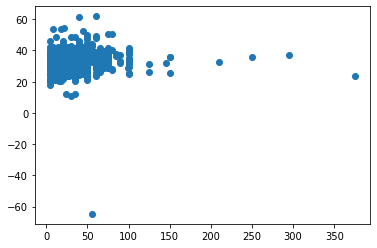

In [23]:
# Make cross validated predictions
predictions = cross_val_predict(model, X_train, y_train, cv=5)
plt.scatter(y_train, predictions)

In [27]:
# Checking R2
accuracy = metrics.r2_score(y_train, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: -0.018230478379610338
